In [36]:
import pandas as pd
import numpy as np
import math
import os

In [31]:
nl_1k = pd.read_csv("/Users/connorlockhart/Documents/GitHub/fall-2025-predicting-movie-success/modified_data/connor_modified_data/z_scores/zscore_nolate_1k.csv")
nl_all = pd.read_csv("/Users/connorlockhart/Documents/GitHub/fall-2025-predicting-movie-success/modified_data/connor_modified_data/z_scores/zscore_nolate_all.csv")
yl_1k = pd.read_csv("/Users/connorlockhart/Documents/GitHub/fall-2025-predicting-movie-success/modified_data/connor_modified_data/z_scores/zscore_yeslate_1k.csv")
yl_all = pd.read_csv("/Users/connorlockhart/Documents/GitHub/fall-2025-predicting-movie-success/modified_data/connor_modified_data/z_scores/zscore_yeslate_all.csv")

In [67]:
df = pd.DataFrame()
df['username'] = nl_1k['username']
reviews = [nl_1k,nl_all,yl_1k,yl_all]

#get count for non zero rows 
cols = nl_1k.iloc[:,1:].columns
df['review_count'] = nl_all[cols].gt(0.1).sum(axis=1)
df['late_review_count'] = yl_all[cols].gt(0.1).sum(axis=1)
#Drop Reviewers which have not reviewed enough movies, threshold is 20% 
rows_to_drop = df[df['review_count']<(len(cols)/5)].index
df.drop(index= rows_to_drop, axis=0, inplace= True)

#Average the columns
#This didn't work
#testdf = pd.DataFrame()
#for item in reviews:
#    testdf = item
#    df["mean"+str(item)] = testdf.iloc[:,1:].mean(axis)=1

df['mean_nl_1k'] = nl_1k.iloc[:,1:].mean(axis=1)
df['mean_nl_all'] = nl_all.iloc[:,1:].mean(axis=1)
df['mean_yl_1k'] = yl_1k.iloc[:,1:].mean(axis=1)
df['mean_yl_all'] = yl_all.iloc[:,1:].mean(axis=1)

#Rank the columns 
rank_df = pd.DataFrame()
for col in df.columns[3:8]:
    rank_df[col] = df[col].rank(ascending = False)
rank_df = rank_df.add_suffix('_rank')
#merge the ranks with the scores
frames = [df, rank_df]
merged_df = pd.concat(frames,axis=1)

#back testing algorithm
#Rerun the above for movies up to a certain amount
movies = ['anora', 'conclave', 'the-brutalist', 'emilia-perez', 'nickel-boys', 'wicked-2024', 'maria-2024', 'oppenheimer-2023', 'poor-things-2023', 'the-holdovers', 'american-fiction', 'everything-everywhere-all-at-once', 'all-quiet-on-the-western-front-2022', 'the-fabelmans', 'the-banshees-of-inisherin', 'women-talking', 'top-gun-maverick', 'elvis-2022', 'coda-2021', 'the-power-of-the-dog', 'west-side-story-2021', 'dont-look-up-2021', 'king-richard', 'tick-tick-boom-2021', 'dune-2021', 'mank', 'nomadland', 'the-trial-of-the-chicago-7', 'borat-subsequent-moviefilm', 'promising-young-woman', 'palm-springs-2020', 'parasite-2019', '1917', 'once-upon-a-time-in-hollywood', 'jojo-rabbit', 'green-book', 'roma-2018', 'black-panther', 'bohemian-rhapsody', 'eighth-grade', 'can-you-ever-forgive-me', 'the-favourite', 'cold-war-2018', 'the-shape-of-water', 'three-billboards-outside-ebbing-missouri', 'lady-bird', 'get-out-2017', 'call-me-by-your-name', 'dunkirk-2017', 'i-tonya', 'blade-runner-2049', 'moonlight-2016', 'la-la-land', 'hidden-figures', 'arrival-2016', 'lion', 'spotlight', 'the-big-short', 'the-revenant-2015', 'the-martian', 'mad-max-fury-road', 'birdman-or-the-unexpected-virtue-of-ignorance', 'boyhood', 'the-grand-budapest-hotel', 'the-imitation-game']
#reverse the list
movies = movies[::-1]
print(len(movies))

#Start with the first 5 years and look up to the first 9 years
numbers = list(range(5,10))

#Truncate the list of movies and perform computations
for i in numbers: 
    truncated_movies = movies[:math.floor(len(movies)*(i/10))]
    print(f"first {i} years: {truncated_movies}")

    df[f"mean_nl_1k_uptoyear{i}"] = nl_1k[truncated_movies].mean(axis=1)
    df[f"mean_nl_all_uptoyear{i}"] = nl_all[truncated_movies].mean(axis=1)
    df[f"mean_yl_1k_uptoyear{i}"] = yl_1k[truncated_movies].mean(axis=1)
    df[f"mean_yl_all_uptoyear{i}"] = yl_all[truncated_movies].mean(axis=1)
    #print(df.head(5))

#Rank the columns 
rank_df = pd.DataFrame()
for col in df.columns[3:]:
    rank_df[col] = df[col].rank(ascending = False)
rank_df = rank_df.add_suffix('_rank')
print(rank_df)
#Merge the ranks with the scores
frames = [df, rank_df]
merged_df = pd.concat(frames,axis=1)

# Reorder columns to place specified ones after "mean_yl_all_uptoyear8"
columns = list(df.columns)
target_columns = ["mean_nl_1k", "mean_nl_all", "mean_yl_1k", "mean_yl_all"]
insertion_point = columns.index("mean_yl_all_uptoyear8") + 1
# Remove target columns from their current positions
columns = [col for col in columns if col not in target_columns]
# Insert target columns after "mean_yl_all_uptoyear9"
columns = columns[:insertion_point] + target_columns + columns[insertion_point:]
# Reassign the reordered columns to the DataFrame
df = df[columns]


merged_df.to_csv("/Users/connorlockhart/Documents/GitHub/fall-2025-predicting-movie-success/modified_data/connor_modified_data/z_scores/zscore_collection.csv", index = False)




65
first 5 years: ['the-imitation-game', 'the-grand-budapest-hotel', 'boyhood', 'birdman-or-the-unexpected-virtue-of-ignorance', 'mad-max-fury-road', 'the-martian', 'the-revenant-2015', 'the-big-short', 'spotlight', 'lion', 'arrival-2016', 'hidden-figures', 'la-la-land', 'moonlight-2016', 'blade-runner-2049', 'i-tonya', 'dunkirk-2017', 'call-me-by-your-name', 'get-out-2017', 'lady-bird', 'three-billboards-outside-ebbing-missouri', 'the-shape-of-water', 'cold-war-2018', 'the-favourite', 'can-you-ever-forgive-me', 'eighth-grade', 'bohemian-rhapsody', 'black-panther', 'roma-2018', 'green-book', 'jojo-rabbit', 'once-upon-a-time-in-hollywood']
first 6 years: ['the-imitation-game', 'the-grand-budapest-hotel', 'boyhood', 'birdman-or-the-unexpected-virtue-of-ignorance', 'mad-max-fury-road', 'the-martian', 'the-revenant-2015', 'the-big-short', 'spotlight', 'lion', 'arrival-2016', 'hidden-figures', 'la-la-land', 'moonlight-2016', 'blade-runner-2049', 'i-tonya', 'dunkirk-2017', 'call-me-by-your-n

Top 10 users (by mean_nl_1k): ['daveleedu', 'connorcarey', 'carter1331', 'chavrosbaby', 'zoerosebryant', 'gubarenko', 'austinburke', 'locarbmonster', 'pstalbot', 'frankenlotter']


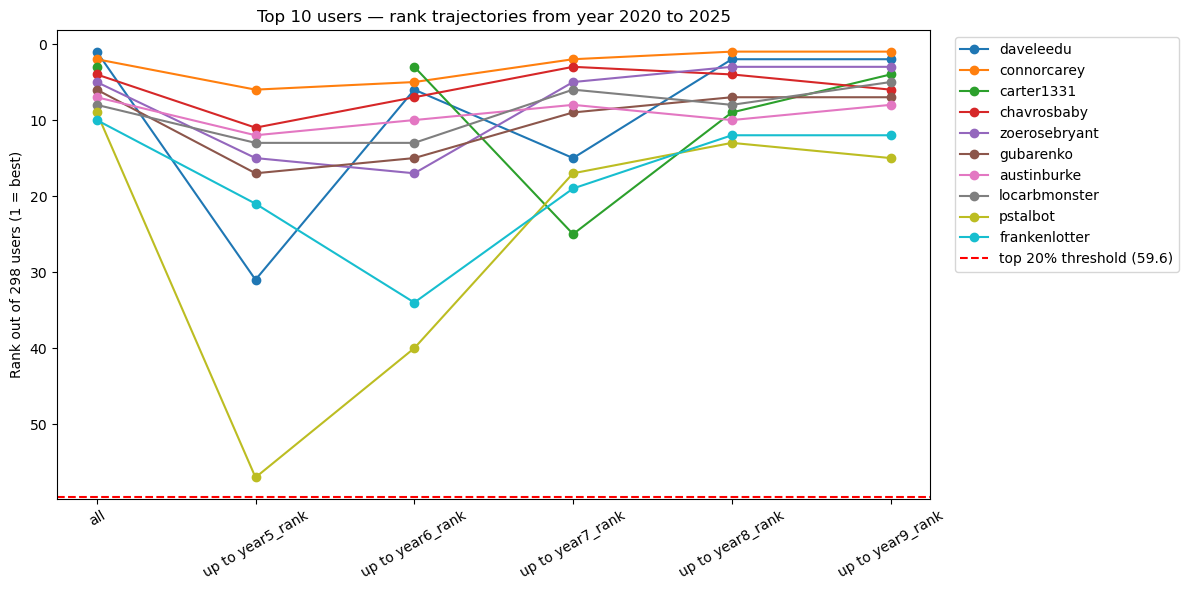

In [66]:
# Plot the top-10 users by mean_nl_1k rank and show their rank trajectories across available rank columns
# This cell depends on variables defined in the previous cell: dfc, rank_cols, top20_threshold

# Determine top 10 users by the primary rank column if available
if 'mean_nl_1k_rank' in dfc.columns:
    top10_users = dfc.nsmallest(10, 'mean_nl_1k_rank')['username'].tolist()
elif 'mean_nl_1k' in dfc.columns:
    # fallback: compute ranks from mean_nl_1k (higher mean -> better rank)
    dfc['_mean_nl_1k_rank_computed'] = dfc['mean_nl_1k'].rank(ascending=False)
    top10_users = dfc.nsmallest(10, '_mean_nl_1k_rank_computed')['username'].tolist()
    if '_mean_nl_1k_rank_computed' not in rank_cols:
        rank_cols = ['_mean_nl_1k_rank_computed'] + rank_cols
else:
    top10_users = []

print('Top 10 users (by mean_nl_1k):', top10_users)

# Ensure we have at least one rank column to plot
if not rank_cols:
    # try to locate any columns that look like mean_nl_1k rank columns
    rank_cols = [c for c in dfc.columns if c.startswith('mean_nl_1k') and c.endswith('_rank')]

rank_cols = [c for c in rank_cols if c in dfc.columns]  # filter out missing ones
if not rank_cols:
    print('No rank columns found to plot.')
else:
    labels = [c.replace('mean_nl_1k_rank','all').replace('mean_nl_1k_uptoyear','up to year').replace('_mean_nl_1k_rank_computed','all_computed') for c in rank_cols]
    x = np.arange(len(rank_cols))
    fig, ax = plt.subplots(figsize=(12,6))
    for u in top10_users:
        row = dfc.loc[dfc['username'] == u]
        if row.empty:
            continue
        # extract ranks for this user across the selected rank cols
        ranks = row.iloc[0][rank_cols].astype(float).values
        ax.plot(x, ranks, marker='o', label=u)
    # horizontal line showing top-20% threshold
    if 'top20_threshold' in globals():
        ax.axhline(top20_threshold, color='red', linestyle='--', label=f'top 20% threshold ({top20_threshold:.1f})')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_ylabel('Rank out of 298 users (1 = best)')
    ax.set_title('Top 10 users — rank trajectories from year 2020 to 2025')
    # invert y so rank 1 is at top (optional)
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()